In [11]:
import geopandas as gpd
import sqlalchemy
import numpy as np


pg = open('db_credentials.txt')
db = pg.read()
pg.close()

# load into db
engine = sqlalchemy.create_engine(db)

df = gpd.read_postgis('select * from crime_merged4', con = engine)

In [12]:
df

,ID,Year,Date,Primary Type,Description,Beat,District,Ward,Community Area,FBI Code,...,S1901_C01_007E,S1901_C01_008E,S1901_C01_009E,S1901_C01_010E,S1901_C01_011E,S2301_C04_001E,S2301_C04_021E,distance_to_bus_stop,distance_to_park,distance_to_walmart
0,10500192,2016.0,04/26/2016 07:45:00 AM,THEFT,OVER $500,2024,20.0,46.0,3.0,06,...,10.2,5.8,9.0,4.3,7.2,4.2,4.3,114.080712,120.960396,4115.826629
1,10500204,2016.0,04/26/2016 12:05:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,1522,15.0,28.0,25.0,08B,...,8.4,2.9,3.9,1.3,0.0,20.2,18.2,103.595904,532.419321,3628.782161
2,10598800,2016.0,07/14/2016 06:30:00 PM,BURGLARY,FORCIBLE ENTRY,511,5.0,21.0,49.0,05,...,11.5,9.0,13.1,0.0,0.0,18.9,9.0,277.884700,208.338578,2362.365436
3,10500767,2016.0,04/27/2016 10:25:00 AM,ASSAULT,SIMPLE,722,7.0,20.0,68.0,08A,...,7.6,1.8,2.9,0.0,0.0,28.5,28.1,292.694039,353.095799,3088.771951
4,10598970,2016.0,07/14/2016 07:30:00 AM,BURGLARY,UNLAWFUL ENTRY,1522,15.0,29.0,25.0,05,...,13.9,6.8,7.9,4.2,0.0,14.5,14.7,85.684398,186.005888,4212.205558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968349,10598120,2016.0,07/14/2016 04:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,323,3.0,6.0,69.0,14,...,15.0,8.7,6.7,2.8,0.9,17.8,18.4,96.268163,309.814437,2987.116695
968350,10598217,2016.0,07/15/2016 03:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,223,2.0,4.0,39.0,08B,...,8.6,5.5,7.5,2.5,9.3,14.2,14.6,61.104873,366.745003,151.552407
968351,10500048,2016.0,04/26/2016 04:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,1722,17.0,45.0,15.0,26,...,14.0,16.8,10.5,8.9,6.9,11.8,10.1,32.812185,352.188496,2201.704993
968352,10598558,2016.0,07/14/2016 03:30:00 PM,THEFT,$500 AND UNDER,1921,19.0,47.0,5.0,06,...,9.1,18.5,21.3,13.9,30.4,2.8,2.9,149.596952,601.234358,3772.813740


In [13]:
df['x'] = df['geom'].apply(lambda x : x.x)
df['y'] = df['geom'].apply(lambda x : x.y)

In [79]:
len(pd.unique(df['Beat']))

418

In [ ]:
#df = df[df['y'] > 41.0]

In [48]:
nbins = 200
h = np.histogram2d(df['x'], df['y'], bins=nbins)

In [52]:
h_a = h[0].flatten()
h_a = h_a[h_a > 0.]
len(h_a)

13645

(array([8.737e+03, 1.845e+03, 4.910e+02, 1.730e+02, 5.900e+01, 4.400e+01,
        1.800e+01, 1.100e+01, 9.000e+00, 4.000e+00]),
 array([  10.,  109.,  208.,  307.,  406.,  505.,  604.,  703.,  802.,
         901., 1000.]),
 <a list of 10 Patch objects>)

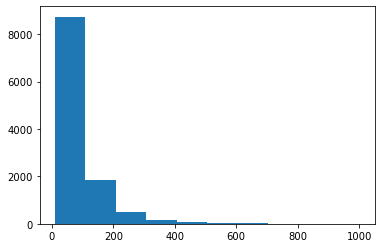

In [53]:
plt.hist(h_a, range = (10,1000))

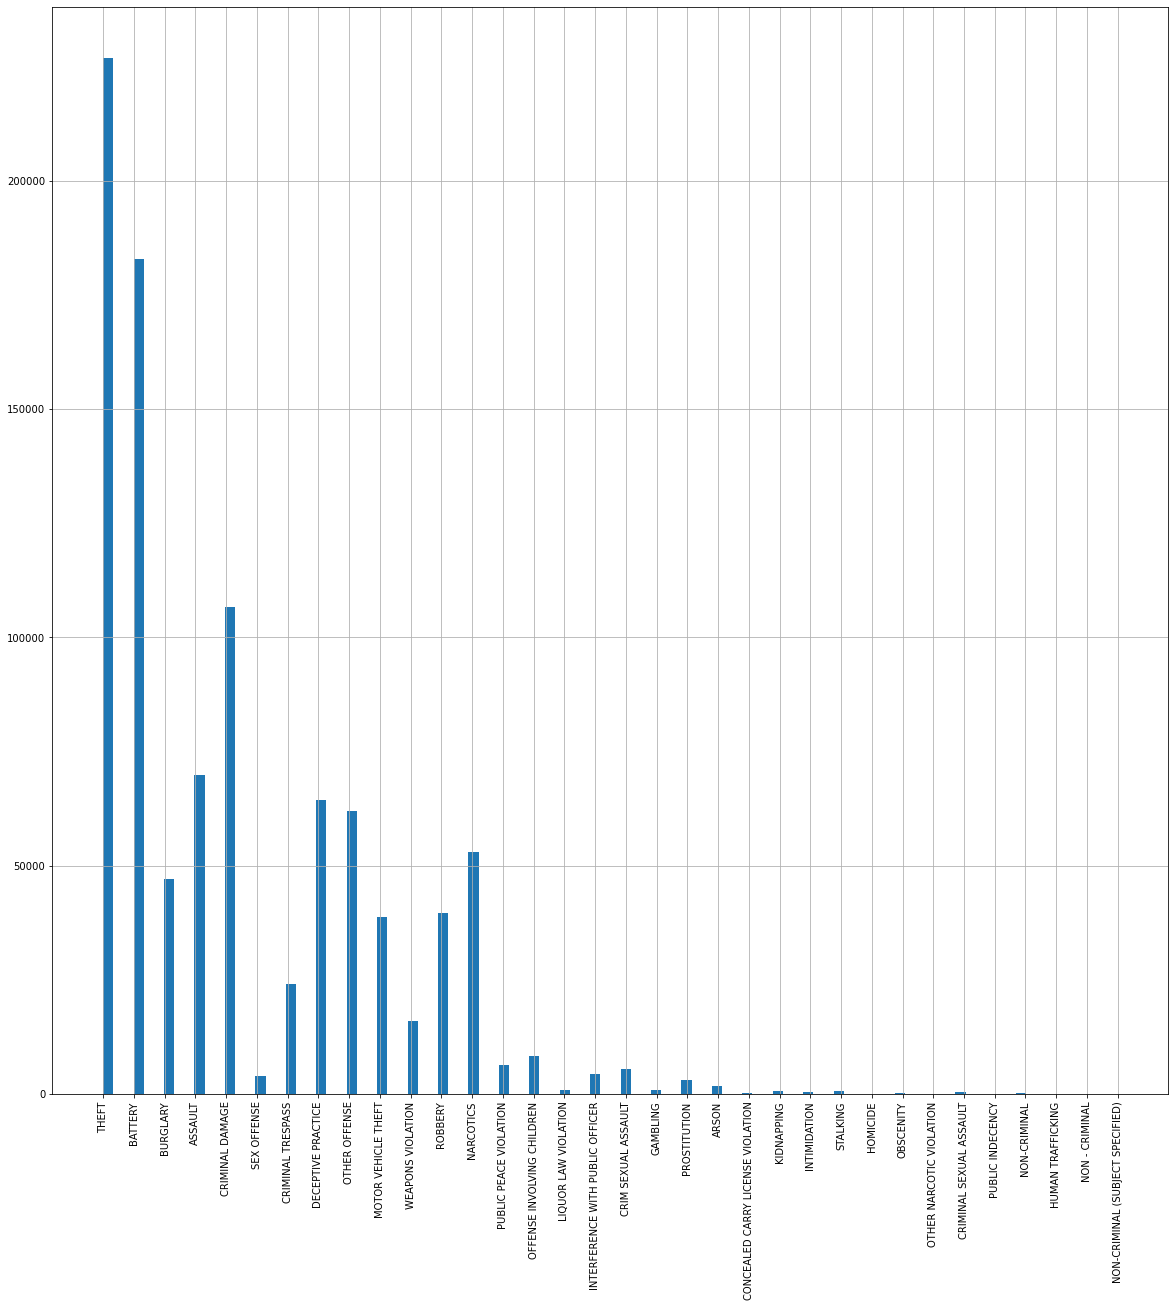

In [77]:
import pandas as pd
#plt.figure(figsize = (20,20))
df['Primary Type'].hist(xrot = 90., figsize = (20,20), bins = 100)

(array([5.26432e+05, 1.34486e+05, 1.65089e+05, 1.14714e+05, 1.35000e+04,
        9.22200e+03, 3.20300e+03, 9.56000e+02, 5.80000e+02, 1.72000e+02]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ]),
 <a list of 10 Patch objects>)

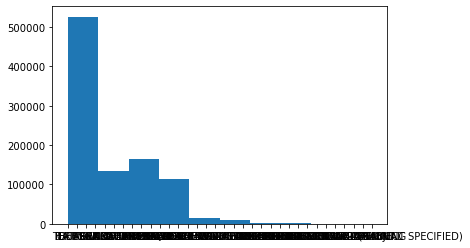

In [74]:
plt.hist(df['Primary Type'])

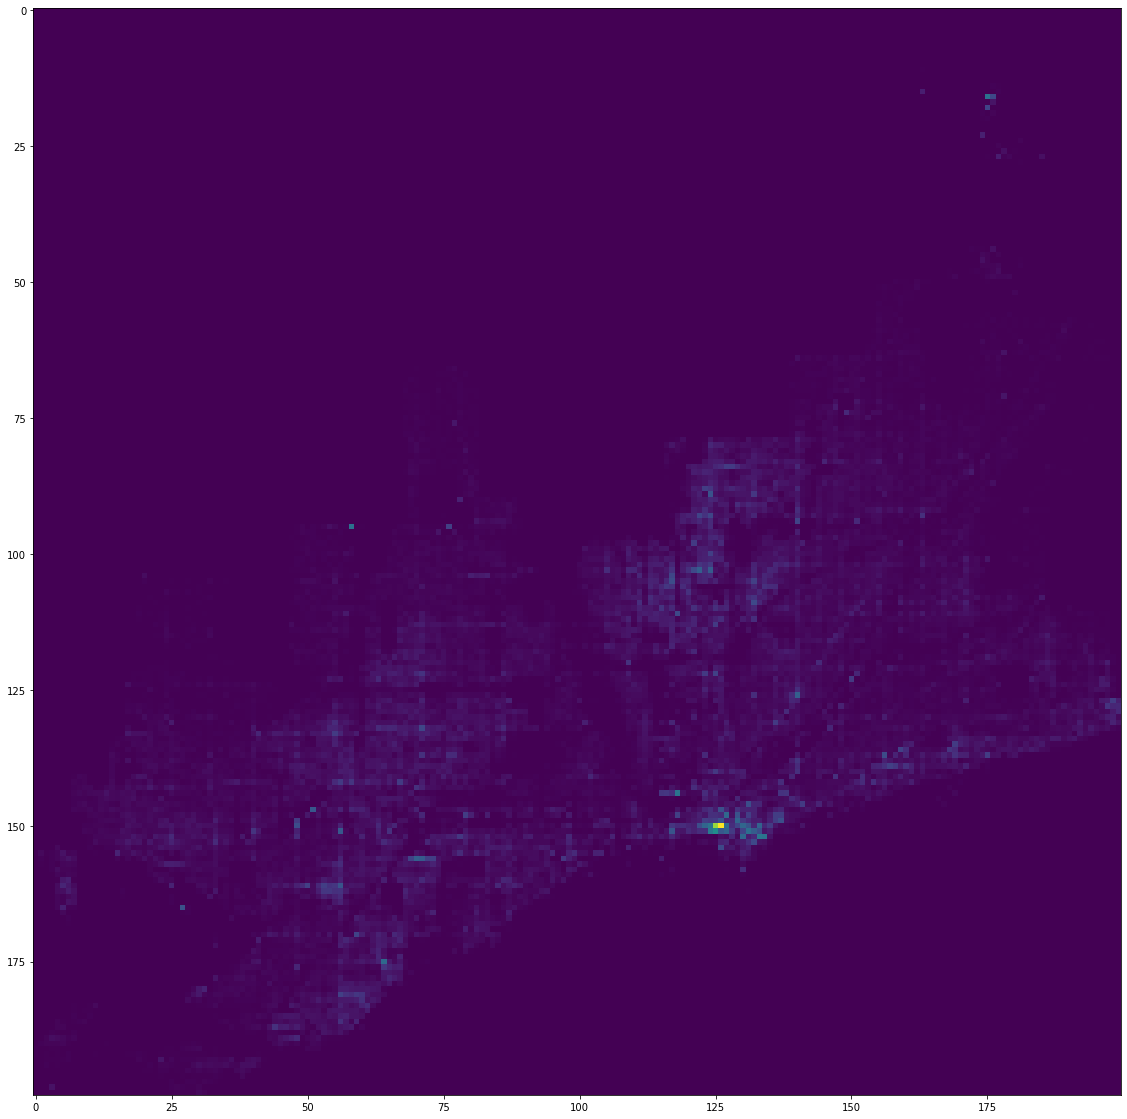

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(h[0])

In [17]:
import gdal

In [18]:
x1 = np.min(h[1])
x2 = np.max(h[1])

y1 = np.min(h[2])
y2 = np.max(h[2])

In [19]:
gt = (
    x1,             #0   top left x
    (x2 - x1)/nbins,  #1 pixelwidth
    0,              #2 north up
    y1,             #3 top left y
    0,              #4 north up
    (y2 - y1)/nbins   #5 pixelheight
)
driver = gdal.GetDriverByName("GTiff")
outdata = driver.Create("test.tif", nbins, nbins, 1, gdal.GDT_Float32)
outdata.SetGeoTransform(gt)##sets same geotransform as input
outdata.SetProjection("epsg:4326")##sets same projection as input
outdata.GetRasterBand(1).WriteArray(np.transpose(h[0]))
outdata.GetRasterBand(1).SetNoDataValue(0.0)##if you want these values transparent
outdata.FlushCache() ##saves to disk!!

In [20]:
from scipy.ndimage import gaussian_filter

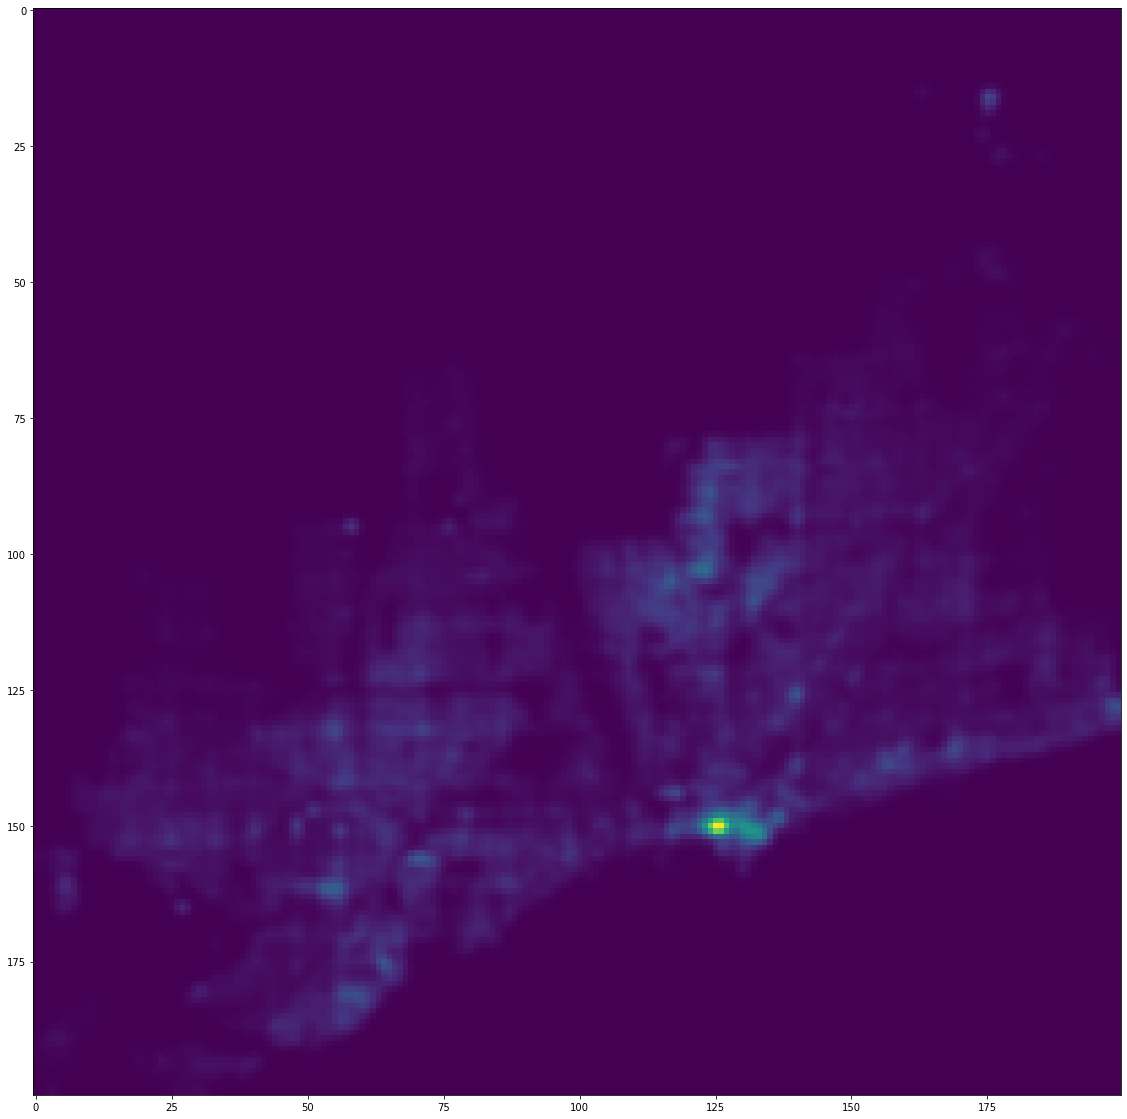

In [21]:
plt.figure(figsize=(20,20))
h2 = gaussian_filter(h[0], sigma=1)
plt.imshow(h2)

In [22]:
driver = gdal.GetDriverByName("GTiff")
outdata = driver.Create("crime_density.tif", nbins, nbins, 1, gdal.GDT_Float32)
outdata.SetGeoTransform(gt)##sets same geotransform as input
outdata.SetProjection("epsg:4326")##sets same projection as input
outdata.GetRasterBand(1).WriteArray(np.transpose(h2))
outdata.GetRasterBand(1).SetNoDataValue(0.0)##if you want these values transparent
outdata.FlushCache() ##saves to disk!!

In [80]:
import rasterio

ModuleNotFoundError: No module named 'rasterio'